# ZILLOW HOUSING DATA TIME SERIES ANALYSIS

## BUSINESS UNDERSTANDING 

### PROBLEM STATEMENT

Real investment firms weigh on many factors when deciding on which investment to make. These firms’ goals are to enhance their decision making processes. With historical real estate market data, the challenge is to leverage data science techniques to identify potential investment opportunities and helping the real estate firms in making informed investment decisions.

### OBJECTIVES
Main Objectives:
* Identify the 5 best zip codes.

Secondary Objectives:
* Predict the prices of the best 5 zipcodes. 

In [24]:
## Importing the necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
from functions import *  
import numpy as np

## DATA UNDERSTANDING

#### Load the dataset

This project uses data from ZIllow housing data,  found [here](https://www.zillow.com/research/data/)

In [25]:
data = pd.read_csv("data/zillow_data.csv")
data.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 30.6+ MB


The dataset contains 14723 rows and 272 columns.    
Each of the row is a unique zipcode.    
The dataset as seen is in a Wide format. Columns 1-7 show the different properties of a house.    
However,  column 8 to column 272 are actual time series values. The columns refer to the median house sales values for their respective month and year.      
This format makes the dataframe intuitive and easy to read. However problems with this dataset may come in when it comes to actually learning from the data. We'll deal with that when we get there.   
The first 7 columns represent:
* RegionID - The Regional ID for the region where a house is located.
* RegionName - The Zipcode. 
* City - The City of a particular house. 
* State - The state in which a home is in. 
* Metro - The metropolitan area where the home is found. 
* CountyName - The county where the home is in. 
* SizeRank - Hapa sijui. 

Drop the unnecessary columns and rename the RegionName to zipcode

In [27]:
#  drop the unnecessary columns
data.drop(["RegionID", "Metro", "SizeRank", "CountyName"], axis=1, inplace=True)

# rename the RegionName to ZipCode
data.rename({"RegionName":"ZipCode"}, axis=1 , inplace=True)

Check for missing values

In [28]:
data.isna().sum()

ZipCode       0
City          0
State         0
1996-04    1039
1996-05    1039
           ... 
2017-12       0
2018-01       0
2018-02       0
2018-03       0
2018-04       0
Length: 268, dtype: int64

As is always the case with time series data, we have missing values. 

In [29]:
# drop the missing values
data.dropna(axis=0, inplace=True)

In [30]:
data.isna().sum().sum()

0

### Choosing zipcodes

We will use Return On Investment (ROI) and Compound Annual Growth Rate (CAGR) as our metrics  to decide the best zipcodes.
ROI measures the profitability while CAGR checks the risk.      
We will measure the best zipcodes for the last 10 years.    
We will do this by adding roi column and cagr column to calculate the return on investment and the cagr respectively for every zipcode.  

In [31]:
# copy the dataframe
sample_data = data.copy()

#add an roi column for the last 10 years
sample_data["roi"] = (sample_data["2018-04"] - sample_data["2008-04"]) / sample_data["2008-04"] * 100

# add cagr column for the last 10 years
sample_data["cagr"] = (((sample_data["2018-04"] / sample_data["2008-04"]) ** (1/10)) -1) * 100
sample_data.head()

,ZipCode,City,State,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,roi,cagr
0,60657,Chicago,IL,334200.0,335400.0,336500.0,337600.0,338500.0,339500.0,340400.0,...,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600,19.130736,1.765925
1,75070,McKinney,TX,235700.0,236900.0,236700.0,235400.0,233300.0,230600.0,227300.0,...,312500,314100,315000,316600,318100,319600,321100,321800,52.367424,4.301178
2,77494,Katy,TX,210400.0,212200.0,212200.0,210700.0,208300.0,205500.0,202500.0,...,320200,320400,320800,321200,321200,323000,326900,329900,32.224449,2.832685
3,60614,Chicago,IL,498100.0,500900.0,503100.0,504600.0,505500.0,505700.0,505300.0,...,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000,14.238266,1.340061
4,79936,El Paso,TX,77300.0,77300.0,77300.0,77300.0,77400.0,77500.0,77600.0,...,120000,120300,120300,120300,120300,120500,121000,121500,-5.300078,-0.543090


We now choose the  best 5 zipcodes depending on the both the ROI and CAGR

In [32]:
# Top 5 based on ROI
top_5_roi = sample_data.nlargest(5, 'roi')

top_5_roi


,ZipCode,City,State,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,roi,cagr
6563,15201,Pittsburgh,PA,34400.0,34600.0,34700.0,34700.0,34800.0,34800.0,34700.0,...,166100,167600,169000,170400,171400,173900,179700,185200,166.474820,10.297487
2580,94043,Mountain View,CA,291700.0,294000.0,296400.0,298900.0,301400.0,304100.0,306800.0,...,1779800,1812000,1847800,1881900,1915700,1965600,2031800,2074900,160.110317,10.031177
1155,11222,New York,NY,149200.0,148400.0,147500.0,146600.0,146000.0,145600.0,145400.0,...,1638700,1640400,1644100,1651200,1661800,1672800,1694000,1721100,157.611136,9.924997
5738,94301,Palo Alto,CA,709500.0,711900.0,715000.0,719000.0,723900.0,729800.0,736900.0,...,4319300,4401100,4481700,4544700,4595100,4668700,4762600,4818400,156.475222,9.876430
117,11211,New York,NY,133200.0,132900.0,132500.0,132200.0,131800.0,131600.0,131500.0,...,1424700,1435300,1440500,1463100,1496100,1531100,1581900,1623700,147.968845,9.506453


In [33]:
# Top 5 based on CAGR
top_5_cagr = sample_data.nlargest(5, 'cagr')

top_5_cagr

,ZipCode,City,State,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,roi,cagr
6563,15201,Pittsburgh,PA,34400.0,34600.0,34700.0,34700.0,34800.0,34800.0,34700.0,...,166100,167600,169000,170400,171400,173900,179700,185200,166.474820,10.297487
2580,94043,Mountain View,CA,291700.0,294000.0,296400.0,298900.0,301400.0,304100.0,306800.0,...,1779800,1812000,1847800,1881900,1915700,1965600,2031800,2074900,160.110317,10.031177
1155,11222,New York,NY,149200.0,148400.0,147500.0,146600.0,146000.0,145600.0,145400.0,...,1638700,1640400,1644100,1651200,1661800,1672800,1694000,1721100,157.611136,9.924997
5738,94301,Palo Alto,CA,709500.0,711900.0,715000.0,719000.0,723900.0,729800.0,736900.0,...,4319300,4401100,4481700,4544700,4595100,4668700,4762600,4818400,156.475222,9.876430
117,11211,New York,NY,133200.0,132900.0,132500.0,132200.0,131800.0,131600.0,131500.0,...,1424700,1435300,1440500,1463100,1496100,1531100,1581900,1623700,147.968845,9.506453


The zipcodes with the best roi are still the zipcodes with the best cagr. 

### DATA PREPROCESSING.

We will convert the dataset to a wide format and make the time column the index for easier manipulation of the dataframe. 

In [34]:
# As seen below, the data is in a wide format,   we need to convert the data to a long format
data.head()

,ZipCode,City,State,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,60657,Chicago,IL,334200.0,335400.0,336500.0,337600.0,338500.0,339500.0,340400.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,75070,McKinney,TX,235700.0,236900.0,236700.0,235400.0,233300.0,230600.0,227300.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,77494,Katy,TX,210400.0,212200.0,212200.0,210700.0,208300.0,205500.0,202500.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,60614,Chicago,IL,498100.0,500900.0,503100.0,504600.0,505500.0,505700.0,505300.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,79936,El Paso,TX,77300.0,77300.0,77300.0,77300.0,77400.0,77500.0,77600.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14718,1338,Ashfield,MA,94600.0,94300.0,94000.0,93700.0,93400.0,93200.0,93000.0,...,216800,217700,218600,218500,218100,216400,213100,209800,209200,209300
14719,3293,Woodstock,NH,92700.0,92500.0,92400.0,92200.0,92100.0,91900.0,91700.0,...,202100,208400,212200,215200,214300,213100,213700,218300,222700,225800
14720,40404,Berea,KY,57100.0,57300.0,57500.0,57700.0,58000.0,58200.0,58400.0,...,121800,122800,124600,126700,128800,130600,131700,132500,133000,133400
14721,81225,Mount Crested Butte,CO,191100.0,192400.0,193700.0,195000.0,196300.0,197700.0,199100.0,...,662800,671200,682400,695600,695500,694700,706400,705300,681500,664400


In [38]:
def melt_data(df):
    """
    Takes the zillow_data dataset in wide form or a subset of the zillow_dataset.  
    Returns a long-form datetime dataframe 
    with the datetime column names as the index and the values as the 'values' column.
    
    If more than one row is passes in the wide-form dataset, the values column
    will be the mean of the values from the datetime columns in all of the rows.
    """
    
    melted = pd.melt(df, id_vars=['ZipCode', 'City', 'State'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    melted.set_index("time", inplace=True)
    return melted

melted_data = melt_data(data) 
melted_data.head()

<ipython-input-38-9e1ecd145005>:12: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)


,ZipCode,City,State,value
time,,,,
1996-04-01,60657,Chicago,IL,334200.0
1996-04-01,75070,McKinney,TX,235700.0
1996-04-01,77494,Katy,TX,210400.0
1996-04-01,60614,Chicago,IL,498100.0
1996-04-01,79936,El Paso,TX,77300.0



Let's get our best 5 zipcodes

In [52]:
# Get every time series entry whose zipcode is our top 5 zipcodes.
bet_5_zipcodes = melted_data[melted_data["ZipCode"].isin(list(top_5_cagr["ZipCode"]))]
bet_5_zipcodes

,ZipCode,City,State,value
time,,,,
1996-04-01,11211,New York,NY,133200.0
1996-04-01,11222,New York,NY,149200.0
1996-04-01,94043,Mountain View,CA,291700.0
1996-04-01,94301,Palo Alto,CA,709500.0
1996-04-01,15201,Pittsburgh,PA,34400.0
...,...,...,...,...
2018-04-01,11211,New York,NY,1623700.0
2018-04-01,11222,New York,NY,1721100.0
2018-04-01,94043,Mountain View,CA,2074900.0


# EDA AND DATA VISUALIZATION.

Check the time series plot for the 5 zipcodes. 
We will first upsample the data to yearly averages and compare the data from 1996 to 2018

<AxesSubplot:xlabel='time'>

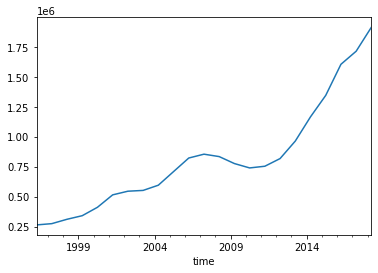

In [59]:
# upsample the data
yearly_best_5 = bet_5_zipcodes["value"].resample("12M").mean()
for zipcode in 

In [ ]:
num = 0
for zipcode in top_5:
    num += 1
    time_data = df[df["ZipCode"] == zipcode]["value"]
    time_data.plot(label=f'ZipCode {zipcode}, ({num})')

plt.title('Home Value Over Time for Top 5 Zip Codes')
plt.xlabel('Time')
plt.ylabel('Home Value')
plt.legend()
plt.show()